In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import imageio
import time

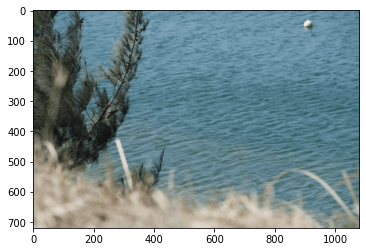

In [7]:
start =time.time()
img=cv.imread("test.png")
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
#img=cv.resize(img,(812,687))
plt.imshow(img)

In [8]:
#不规则区域
#mask为用户选定的区域
mask=np.zeros((img.shape[0],img.shape[1]))
region=[100,400,500,800]

direction=[2,1]
#将流动方向direction化为单位向量
mag=0 #幅
for i in range(len(direction)):
    mag+=direction[i]*direction[i]
direction[0]=direction[0]/mag
direction[1]=direction[1]/mag
#此处先随意指定了一个mask
for x in range(region[0],region[1]):
        for y in range(region[2],region[3]):    
            mask[x,y]=1


framecount=40 #初始的帧数

#处理mask的边缘问题
mask1=np.ones((img.shape[0],img.shape[1]))

In [9]:
buf=[img]
#选定区域的图像
for i in range(framecount):
    tmp=img.copy()
    for x in range(mask.shape[0]):
        for y in range(mask.shape[1]):
            if mask[x,y]==1:
                if 0<=int(x+i*direction[0])<=img.shape[0] and 0<=int(y-i*direction[1])<=img.shape[1]:
                    tmp[x,y]=img[int(x+i*direction[0])-1,int(y-i*direction[1])-1]
               
    if i==0:
        buf.append(tmp)
    else:
        buf.append(cv.addWeighted(buf[i],0.5,tmp,0.5,0))   
gif=imageio.mimsave('middle.gif',buf,'GIF',duration=0.05)    

In [6]:
result=[]
half=int(framecount/2)
alpha=1/half
iteration=2

for n in range(iteration):
    for i in range(half):
        result.append(cv.addWeighted(buf[i],i*alpha,buf[(i+half)],1-i*alpha,0))
    for i in range(half):
        result.append(cv.addWeighted(buf[i+half],1-i*alpha,buf[i],i*alpha,0))


gif=imageio.mimsave('test2.gif',result,'GIF',duration=0.05)
end =time.time()
print(end-start)

37.015279054641724
